# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [11]:
# Criando uma funcao para analise bivariada
def analise_bivariada(df, var_resposta, var_explicativa):
    """
    Realiza análise bivariada entre uma variável resposta e uma variável explicativa.

    Parâmetros:
    - df (pd.DataFrame): O dataframe contendo os dados a serem analisados
    - var_resposta (str): O nome da variável de resposta (ex.: 'flag_doente')
    - var_explicativa (str): O nome da variável explicativa (ex.: 'sex')

    Retorna:
    - bivariada_df (pd.DataFrame): Um dataframe com a análise bivariada
    """
    bivariada = (
        df.groupby(var_explicativa)[var_resposta]
        .agg(
            saudaveis = lambda x: (x == 0).sum(),
            doentes = lambda x: (x == 1).sum()
        )
        .reset_index()
    )
    bivariada['total'] = bivariada['saudaveis'] + bivariada['doentes']
    bivariada['percent_doentes'] = (bivariada['doentes'] / bivariada['total']) * 100
    return bivariada


# Analise bivariada para 'sex'
bivariada_sex = analise_bivariada(df, 'flag_doente', 'sex')
print("analise Bivariada (sex):")
print(bivariada_sex)

# Analise bivariada para 'cp'
bivariada_cp = analise_bivariada(df, 'flag_doente', 'cp')
print("\nAnalise Bivariada (cp):")
print(bivariada_cp)

# Analise bivariada para 'exang'
bivariada_exang = analise_bivariada(df, 'flag_doente', 'exang')
print("\nnalise Bivariada (exang):")
print(bivariada_exang)

analise Bivariada (sex):
   sex  saudaveis  doentes  total  percent_doentes
0  0.0         72       25     97        25.773196
1  1.0         92      114    206        55.339806

Analise Bivariada (cp):
    cp  saudaveis  doentes  total  percent_doentes
0  1.0         16        7     23        30.434783
1  2.0         41        9     50        18.000000
2  3.0         68       18     86        20.930233
3  4.0         39      105    144        72.916667

nalise Bivariada (exang):
   exang  saudaveis  doentes  total  percent_doentes
0    0.0        141       63    204        30.882353
1    1.0         23       76     99        76.767677


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.

In [15]:
def categorizar_variavel_continua(df, var_resposta, var_explicativa, num_grupos=5):
    """
    Categoriza uma variável quantitativa contínua em grupos e realiza análise bivariada.

    Parâmetros:
    - df (pd.DataFrame): O dataframe contendo os dados a serem analisados
    - var_resposta (str): O nome da variável de resposta (ex.: 'flag_doente')
    - var_explicativa (str): O nome da variável explicativa contínua a ser categorizada (ex.: 'age')
    - num_grupos (int): O número de categorias (grupos) desejados. O padrão é 5.

    Retorna:
    - bivariada_df (pd.DataFrame): Um dataframe com a análise bivariada.
    """
    # Categorizar a variavel continua em 'num_grupos' categorizar usando os quantis
    df[f'{var_explicativa}_categoriza'] = pd.qcut(df[var_explicativa], q=num_grupos, duplicates='drop')

    # Realizar a analise bivariada nos grupos da variavel categorizada
    bivariada = (
        df.gruopby(f'{var_explicativa}_categoriza')[var_resposta]
        .agg(
            saudaveis=lambda x: (x == 0).sum(),
            doentes=lambda  x: (x == 1).sum()
        )
        .reset_index()
    )
print("Analise Bivariada (age):")
print(categorizar_variavel_continua)

Analise Bivariada (age):
<function categorizar_variavel_continua at 0x77dcf88085e0>


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [19]:
import statsmodels.api as sm
import patsy

# Selecionar as variaveis e ajustar o modelo
formula = 'flag_doente ~ C(sex) + C(cp) + trestbps + age'

# Ajustando o modelo
modelo = sm.Logit.from_formula(formula, data=df).fit()

Optimization terminated successfully.
         Current function value: 0.476154
         Iterations 6


4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

/tmp/ipykernel_15683/2987457502.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('prob_grupo')


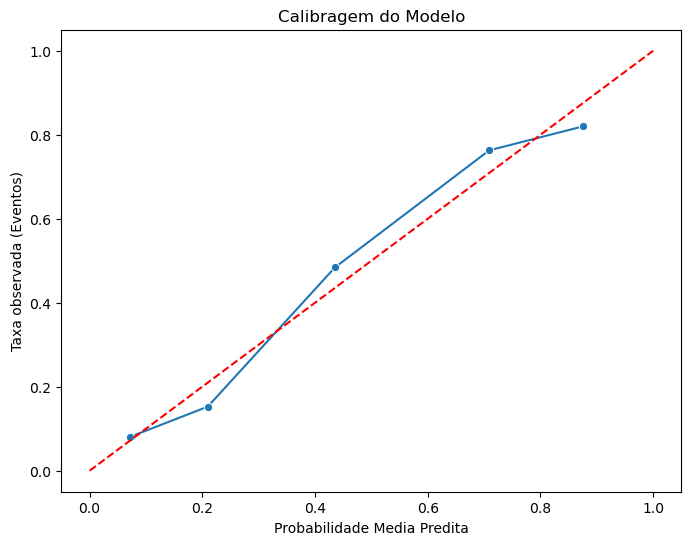

In [23]:
# Passo 1: Prever as probabilidades de evento
df['prob_predita'] = modelo.predict()

# Passo 2: Categorizar as probabilidades em 5 grupos
df['prob_grupo'] = pd.qcut(df['prob_predita'], q=5, duplicates='drop')

# Passo 3: Calcular a probabilidade media predita e a taxa de eventos por grupo
calibragem = (
    df.groupby('prob_grupo')
    .agg(
        prob_media_predita=('prob_predita', 'mean'),
        taxa_eventos=('flag_doente', 'mean')
    )
    .reset_index()
)

# Passo 4: comparar graficamente o valor esperado (predito) versus observado
plt.figure(figsize=(8, 6))
sns.lineplot(data=calibragem, x='prob_media_predita', y='taxa_eventos', marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='red') # Linha de calibragem ideal
plt.xlabel('Probabilidade Media Predita')
plt.ylabel('Taxa observada (Eventos)')
plt.title('Calibragem do Modelo')
plt.show()

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [27]:
from sklearn.metrics import accuracy_score, roc_auc_score
from scipy.stats import ks_2samp

# Acurácia
df['classe_predita'] = (df['prob_predita'] >= 0.5).astype(int)
acuracia = accuracy_score(df['flag_doente'], df['classe_predita'])

# GINI
auc = roc_auc_score(df['flag_doente'], df['prob_predita'])
gini = 2 * auc - 1

# KS
eventos = df.loc[df['flag_doente'] == 1, 'prob_predita']
nao_eventos = df.loc[df['flag_doente'] == 0, 'prob_predita']
ks_stat, _ = ks_2samp(eventos, nao_eventos)

# Resultados
print(f'Acurácia: {acuracia:.2f}')
print(f'GINI: {gini:.2f}')
print(f'KS: {ks_stat:.2f}')

Acurácia: 0.80
GINI: 0.70
KS: 0.59


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [31]:
# Adicionando `chol` (colesterol sérico) e `thalach` (frequência cardíaca máxima) ao modelo
formula_novo_modelo = 'flag_doente ~ C(sex) + C(cp) + trestbps + age + chol + thalach'

# Ajustando o modelo com a nova formulação
novo_modelo = sm.Logit.from_formula(formula_novo_modelo, data=df).fit()

# Resumo do novo modelo
print(novo_modelo.summary())

Optimization terminated successfully.
         Current function value: 0.439233
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            8
Date:                Sun, 02 Feb 2025   Pseudo R-squ.:                  0.3632
Time:                        12:24:59   Log-Likelihood:                -133.09
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 8.231e-29
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.2652      2.196     -1.487      0.137      -7.570       1.040
C(sex)[T.1.0]     2.

/tmp/ipykernel_15683/77737918.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('prob_grupo_novo')


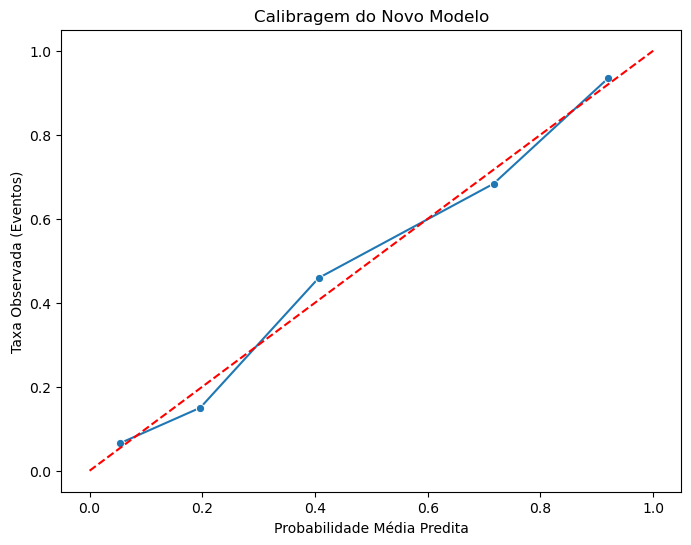

In [33]:
df['prob_predita_novo'] = novo_modelo.predict()

# Categorizar em grupos (por quantis)
df['prob_grupo_novo'] = pd.qcut(df['prob_predita_novo'], q=5, duplicates='drop')

# Calibragem do novo modelo
calibragem_novo = (
    df.groupby('prob_grupo_novo')
    .agg(
        prob_media_predita=('prob_predita_novo', 'mean'),
        taxa_eventos=('flag_doente', 'mean')
    )
    .reset_index()
)

# Gráfico de calibragem
plt.figure(figsize=(8, 6))
sns.lineplot(data=calibragem_novo, x='prob_media_predita', y='taxa_eventos', marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Linha ideal
plt.xlabel('Probabilidade Média Predita')
plt.ylabel('Taxa Observada (Eventos)')
plt.title('Calibragem do Novo Modelo')
plt.show()


In [35]:
# Acurácia do novo modelo
df['classe_predita_novo'] = (df['prob_predita_novo'] >= 0.5).astype(int)
acuracia_novo = accuracy_score(df['flag_doente'], df['classe_predita_novo'])
print(f'Acurácia do Novo Modelo: {acuracia_novo:.2f}')

# GINI do novo modelo
auc_novo = roc_auc_score(df['flag_doente'], df['prob_predita_novo'])
gini_novo = 2 * auc_novo - 1
print(f'GINI do Novo Modelo: {gini_novo:.2f}')

# KS do novo modelo
eventos_novo = df.loc[df['flag_doente'] == 1, 'prob_predita_novo']
nao_eventos_novo = df.loc[df['flag_doente'] == 0, 'prob_predita_novo']
ks_stat_novo, _ = ks_2samp(eventos_novo, nao_eventos_novo)
print(f'KS do Novo Modelo: {ks_stat_novo:.2f}')

Acurácia do Novo Modelo: 0.80
GINI do Novo Modelo: 0.76
KS do Novo Modelo: 0.62


In [37]:
print(f'Comparação de Modelos:')
print(f'- Acurácia: Antigo = {acuracia:.2f}, Novo = {acuracia_novo:.2f}')
print(f'- GINI: Antigo = {gini:.2f}, Novo = {gini_novo:.2f}')
print(f'- KS: Antigo = {ks_stat:.2f}, Novo = {ks_stat_novo:.2f}')

Comparação de Modelos:
- Acurácia: Antigo = 0.80, Novo = 0.80
- GINI: Antigo = 0.70, Novo = 0.76
- KS: Antigo = 0.59, Novo = 0.62


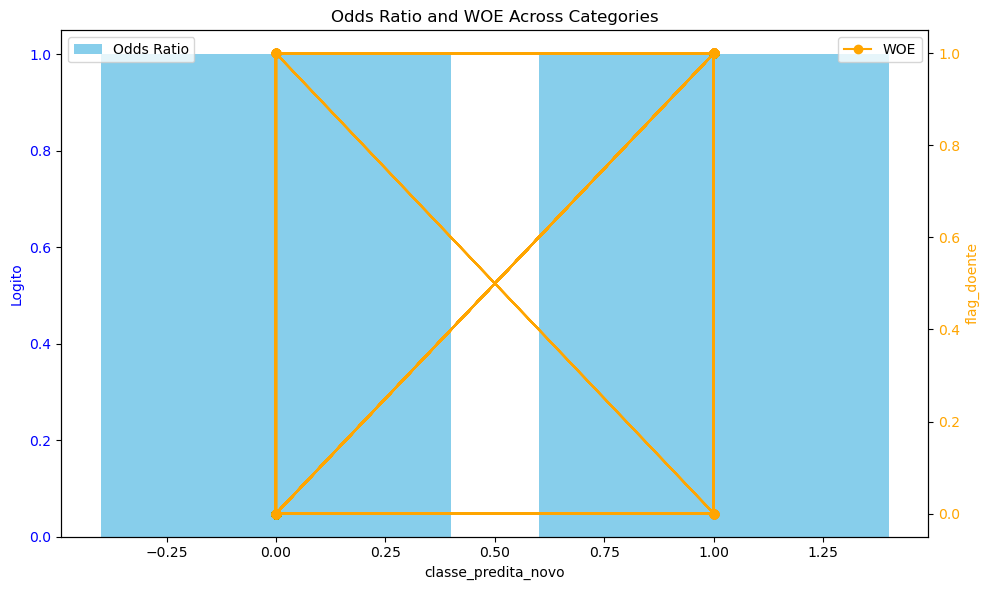

In [59]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for odds_ratio
ax1.bar(df['classe_predita_novo'], df['flag_doente'], color='skyblue', label='Odds Ratio')
ax1.set_xlabel('classe_predita_novo')
ax1.set_ylabel('Logito', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Odds Ratio and WOE Across Categories')
ax1.legend(loc='upper left')

# Line plot for WOE
ax2 = ax1.twinx()
ax2.plot(df['classe_predita_novo'], df['flag_doente'], color='orange', label='WOE', marker='o')
ax2.set_ylabel('flag_doente', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()